## 1. Load/Download the source Data

- winequality-red.csv
  - 1/2 members, Erasmus Students
- winequality-white.csv
  - 3/4 members
    - María Blanco González-Mohíno
    - Adrián Ruíz Esteban
    - José Alberto Seco Sánchez Camacho
    - Pablo Velasco Crespo

## 2. Transform data on a DataFrame

In [ ]:
import pandas as pd
from sklearn import preprocessing 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from sklearn.neighbors import LocalOutlierFactor
import sklearn.cluster
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import DBSCAN
import sklearn.neighbors
from sklearn.cluster import KMeans
from sklearn import metrics

In [ ]:
!wget https://raw.githubusercontent.com/zygmuntz/wine-quality/master/winequality/winequality-white.csv

--2021-10-30 09:13:32--  https://raw.githubusercontent.com/zygmuntz/wine-quality/master/winequality/winequality-white.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 264426 (258K) [text/plain]
Saving to: ‘winequality-white.csv’

winequality-white.c 100%[===================>] 258.23K  --.-KB/s    in 0.04s   

2021-10-30 09:13:33 (6.40 MB/s) - ‘winequality-white.csv’ saved [264426/264426]



In [ ]:
df_white = pd.read_csv("winequality-white.csv", sep =";")
df_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


## 3. Preprocessing

- Normalization (MinMax, Standard, ....)
- Feature Selection
  - **Do not use *quality* to build the models**
  - **Use quality only in the analysis/interpretation step**
  


In this part the feature "quality" is extracted as it is not usefull to build the model

In [ ]:
exclude = ['quality']
df_without_quality = df_white.loc[:, df_white.columns.difference(exclude)]
df_without_quality.describe()

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,total sulfur dioxide,volatile acidity
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,10.514267,0.045772,0.334192,0.994027,6.854788,35.308085,3.188267,6.391415,0.489847,138.360657,0.278241
std,1.230621,0.021848,0.121020,0.002991,0.843868,17.007137,0.151001,5.072058,0.114126,42.498065,0.100795
min,8.000000,0.009000,0.000000,0.987110,3.800000,2.000000,2.720000,0.600000,0.220000,9.000000,0.080000
25%,9.500000,0.036000,0.270000,0.991723,6.300000,23.000000,3.090000,1.700000,0.410000,108.000000,0.210000
50%,10.400000,0.043000,0.320000,0.993740,6.800000,34.000000,3.180000,5.200000,0.470000,134.000000,0.260000
75%,11.400000,0.050000,0.390000,0.996100,7.300000,46.000000,3.280000,9.900000,0.550000,167.000000,0.320000
max,14.200000,0.346000,1.660000,1.038980,14.200000,289.000000,3.820000,65.800000,1.080000,440.000000,1.100000


There is no null nor categorical values:


In [ ]:
print(df_without_quality.dtypes)
print(pd.isnull(df_without_quality).any())

alcohol                 float64
chlorides               float64
citric acid             float64
density                 float64
fixed acidity           float64
free sulfur dioxide     float64
pH                      float64
residual sugar          float64
sulphates               float64
total sulfur dioxide    float64
volatile acidity        float64
dtype: object
alcohol                 False
chlorides               False
citric acid             False
density                 False
fixed acidity           False
free sulfur dioxide     False
pH                      False
residual sugar          False
sulphates               False
total sulfur dioxide    False
volatile acidity        False
dtype: bool


Now is time to normalize the data to use it in PCA algorithm

In [ ]:
scaler = preprocessing.StandardScaler() 
standar_df = scaler.fit_transform(df_without_quality) # Standar deviation from 0 to 1
standar_df # Type numpy.narray

array([[-1.39315246e+00, -3.53550004e-02,  2.13280202e-01, ...,
        -3.49184257e-01,  7.44565035e-01, -8.17699008e-02],
       [-8.24275678e-01,  1.47747079e-01,  4.80011213e-02, ...,
         1.34184656e-03, -1.49684624e-01,  2.15895632e-01],
       [-3.36667007e-01,  1.93522599e-01,  5.43838363e-01, ...,
        -4.36815783e-01, -9.73335626e-01,  1.74519434e-02],
       ...,
       [-9.05543789e-01, -2.18457080e-01, -1.19159198e+00, ...,
        -2.61552731e-01, -6.43875225e-01, -3.79435433e-01],
       [ 1.85757201e+00, -1.08819196e+00, -2.82557040e-01, ...,
        -9.62604939e-01, -6.67408111e-01,  1.16673788e-01],
       [ 1.04489089e+00, -1.17974300e+00,  3.78559282e-01, ...,
        -1.48839409e+00, -9.49802740e-01, -6.77100966e-01]])

## 4. Dimensionality Reduction 

- Dimensionality Reduction
- Visualization



In [ ]:
# Maximizes the variance among all k-dimensional spaces
pca = PCA()
X_pca = pca.fit_transform(standar_df) 
X_pca

array([[ 3.67694351, -0.54523329, -0.93042188, ...,  0.15060912,
        -0.07590513,  0.04218974],
       [-0.64458784,  0.43076995, -0.3563307 , ..., -1.06354951,
        -0.25391879,  0.12790434],
       [ 0.15529055, -1.18979993, -0.01753152, ...,  0.54965435,
         0.85557014, -0.18429532],
       ...,
       [-0.77973054, -0.40848012, -0.66467688, ..., -1.23917021,
         0.25539742,  0.10501843],
       [-3.40730151,  0.9157439 , -0.26829676, ..., -0.10141101,
        -0.64950121,  0.01813183],
       [-2.8232115 , -0.13093864,  0.21388983, ..., -0.5388097 ,
        -0.29789266, -0.04243534]])

In [ ]:
print("The variance (the eigenvalues of the covariance matrix is): ",pca.explained_variance_)
print("\nThe percentage of the explained variance is: ",pca.explained_variance_ratio_) 
# This will return a vector x such that x[i] returns the cumulative variance explained by the first i+1 dimensions.
print("\nCumulative sum [0-1]: ",pca.explained_variance_ratio_.cumsum()) 

The variance (the eigenvalues of the covariance matrix is):  [3.2229119  1.57556161 1.22192081 1.01873034 0.97353334 0.93893321
 0.7267464  0.59948087 0.41422824 0.28954625 0.0206533 ]

The percentage of the explained variance is:  [0.29293217 0.14320363 0.11106103 0.09259294 0.08848496 0.08534014
 0.06605437 0.05448713 0.03764942 0.02631701 0.00187719]

Cumulative sum [0-1]:  [0.29293217 0.4361358  0.54719683 0.63978977 0.72827474 0.81361487
 0.87966924 0.93415637 0.9718058  0.99812281 1.        ]


In [ ]:
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

We have selected 6 components because it is the closest value to 0.85 (a strong correlation). 

Here we compute the PCA algorithm with the components selected.

In [ ]:
pca = PCA (n_components = 6)
X_pca = pca.fit_transform(standar_df)

## 5. Outlier Detection (optional)



In [ ]:
dist = sklearn.neighbors.DistanceMetric.get_metric('euclidean')
matsim = dist.pairwise(X_pca)

Now we are going to compute the distance from each point to its neighbours

In [ ]:
minPts=3 #Neighbours

A = kneighbors_graph(X_pca, minPts, include_self=False)
Ar = A.toarray()

seq = []
for i,s in enumerate(X_pca):
    for j in range(len(X_pca)):
        if Ar[i][j] != 0:
            seq.append(matsim[i][j])
            
seq.sort()

In [ ]:
fig = px.line(x=np.arange(0, len(seq), 1), y=seq)
fig.show()

After testing with different clusters we believe it is best to choose different clusters from 1.5 to 2.9 with intervals of 0.2.

In [ ]:
results = []
for eps in np.arange(1.5, 2.9, 0.20):
  db = DBSCAN(eps, min_samples=minPts).fit(X_pca)
  core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
  core_samples_mask[db.core_sample_indices_] = True
  labels = db.labels_
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  n_outliers = list(labels).count(-1)
  results.append([eps, n_clusters_, n_outliers])


from tabulate import tabulate
print(tabulate(results, headers = ("eps", "clusters", "outliers")))

  eps    clusters    outliers
-----  ----------  ----------
  1.5           9         143
  1.7           4          77
  1.9           4          51
  2.1           4          37
  2.3           4          28
  2.5           2          22
  2.7           2          15


We have chosen an epsilon of 2.3 as it has a reasonable number of clusters (4) with a low number of outliers (28).


In [ ]:
db = DBSCAN(eps=2.3, min_samples=minPts).fit(X_pca)
labels = db.labels_

As we can see there are some outliers but we can not identify them due to it is plot in 2D figure, so we will proceed to find the outliers below.

In [ ]:
fig = px.scatter(x=X_pca[:,0], y= X_pca[:,1], color = labels)

fig.show()

Now, we are going to introduce in the dataframe the group of outliers, and show it.

In [ ]:
df_without_quality['dbscan_group'] = labels

df_without_quality[df_without_quality['dbscan_group'] == -1]

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,total sulfur dioxide,volatile acidity,dbscan_group
325,10.5,0.057,0.31,0.99460,7.5,131.0,3.18,5.80,0.59,313.0,0.270,-1
372,10.0,0.048,0.19,0.99340,6.6,17.0,3.34,0.80,0.56,204.0,0.905,-1
484,9.6,0.346,0.30,0.99540,6.2,79.0,3.29,6.60,0.58,200.0,0.370,-1
687,9.0,0.290,0.30,0.99840,6.8,22.0,3.08,13.00,0.67,193.0,0.670,-1
745,12.2,0.022,1.66,0.99165,7.4,34.0,3.26,2.10,0.55,113.0,0.200,-1
1034,9.1,0.244,0.46,0.99830,7.9,33.0,2.87,10.60,0.74,227.0,0.640,-1
1217,9.2,0.301,0.38,0.99930,8.0,24.0,2.94,12.10,0.48,220.0,0.610,-1
1653,8.8,0.053,0.28,1.01030,7.9,35.0,3.15,31.60,0.38,176.0,0.330,-1
1663,8.8,0.053,0.28,1.01030,7.9,35.0,3.15,31.60,0.38,176.0,0.330,-1
1865,10.2,0.255,0.44,0.99580,7.6,28.0,3.12,8.30,0.43,142.0,0.360,-1


In [ ]:
df_without_quality.describe()

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,total sulfur dioxide,volatile acidity,dbscan_group
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,10.514267,0.045772,0.334192,0.994027,6.854788,35.308085,3.188267,6.391415,0.489847,138.360657,0.278241,-0.002042
std,1.230621,0.021848,0.121020,0.002991,0.843868,17.007137,0.151001,5.072058,0.114126,42.498065,0.100795,0.119542
min,8.000000,0.009000,0.000000,0.987110,3.800000,2.000000,2.720000,0.600000,0.220000,9.000000,0.080000,-1.000000
25%,9.500000,0.036000,0.270000,0.991723,6.300000,23.000000,3.090000,1.700000,0.410000,108.000000,0.210000,0.000000
50%,10.400000,0.043000,0.320000,0.993740,6.800000,34.000000,3.180000,5.200000,0.470000,134.000000,0.260000,0.000000
75%,11.400000,0.050000,0.390000,0.996100,7.300000,46.000000,3.280000,9.900000,0.550000,167.000000,0.320000,0.000000
max,14.200000,0.346000,1.660000,1.038980,14.200000,289.000000,3.820000,65.800000,1.080000,440.000000,1.100000,3.000000


To make it easier to find the reason why the different wines are outliers we have resorted to the interquartile range, below we show the bottom outliers, under 25% and the top outliers, beyond 75%.

In [ ]:
# This is just to show the data in a funcy way
def pivot(data, name):
  nombre = df_without_quality.columns
  dic = {}
  for i in nombre:
   if data[i]:
    dic.update({i:data[i]})

  print(f'{name} PIVOT')
  print('-----------------------------------------------------')
  print("{:<30} {:<30}".format('Features', 'Pivot'))
  print('-----------------------------------------------------')
  for key, value in dic.items():
      pivot = value
      print("{:<30} {:<30}".format(key, pivot))
  print('\n')

In [ ]:
iqr = df_without_quality.quantile(0.75)-df_without_quality.quantile(0.25)
# Beyond 75%
high = df_without_quality.quantile(0.75) + 1.5*iqr
# Below 25%
low = df_without_quality.quantile(0.25) - 1.5*iqr

pivot(high, 'TOP')
pivot(low, 'BOTTOM')

TOP PIVOT
-----------------------------------------------------
Features                       Pivot                         
-----------------------------------------------------
alcohol                        14.25                         
chlorides                      0.07100000000000001           
citric acid                    0.5700000000000001            
density                        1.0026662499999999            
fixed acidity                  8.8                           
free sulfur dioxide            80.5                          
pH                             3.5649999999999995            
residual sugar                 22.200000000000003            
sulphates                      0.7600000000000001            
total sulfur dioxide           255.5                         
volatile acidity               0.48500000000000004           


BOTTOM PIVOT
-----------------------------------------------------
Features                       Pivot                         
-------

Here we calculate which outliers belongs to the top and bottom set of outliers.

In [ ]:
diccionario_top = {}
print("TOP OUTLIER")
for i in valores.columns: #Calculate top outlier
  top = []
  for index, row in valores.iterrows():
    if((row[i]>high[i])==True):
      top.append(index) 
      diccionario_top.update({i: top})
print(tabulate(diccionario_top, headers = 'keys'))

diccionario_bottom = {}
print("BOTTOM OUTLIER")
for i in valores.columns: #Calculate bottom outlier
  top = []
  for index, row in valores.iterrows():
    if((row[i]<low[i])==True):
      top.append(index) 
      diccionario_bottom.update({i: top})

del diccionario_bottom['dbscan_group']
print(tabulate(diccionario_bottom, headers = 'keys'))

TOP OUTLIER
  chlorides    citric acid    density    fixed acidity    free sulfur dioxide    pH    residual sugar    sulphates    total sulfur dioxide    volatile acidity
-----------  -------------  ---------  ---------------  ---------------------  ----  ----------------  -----------  ----------------------  ------------------
        484            745       1653             2162                    325  2321              1653         2668                     325                 372
        687           2781       1663             2668                   1931  2872              1663         2872                    1931                 687
       1034           3152       2781             3307                   2334  4259              2781         4792                    3152                1034
       1217                      3619                                    2872                    3619         4815                    4745                1217
       1865                      3

Now, we show how each of the outliers would be analyzed:

*   **Outlier 484**: has a chloride value of 0.394.
It is also the maximum chloride value found in this dataframe. In this case the pivot value for the chloride is 0.07.
*   **Outlier 2321**: This outlier has a fixed acid value of 4.6 and citric acid value of zero, when its lower pivots are 4.8 and 0.09 respectively.
This wine is also a top outlier thanks to the pH as it has a level of 3.79 when the upper pH pivot is 3.565.

**NOTE:**  The value of quartile 75% + 1.5 * IQR is the upper pivot that determines the top outliers, and the value of the quartile 25% - 15 * IQR is the lower pivot that determines the low outlier.




In [ ]:
number_elements = df_without_quality.shape[0]
number_outliers = df_without_quality[df_without_quality['dbscan_group'] == -1].shape[0]
percentage = number_outliers*100/number_elements
percentage

0.5716619028174765

Here we calculate the percentage of outliers with respect to the total number of elements, as we can see we get that the outliers are the 0'57% of the data, so it will not be necesary the extraction of them.

## 6. Clustering

- k-means → Chosen
- k-means + HAC

- HAC
- DBSCAN




###K-MEANS


In [ ]:
init = 'random' # As we initialize every centroid random
iterations = 10 
max_iter = 500 
tol = 1e-04 
random_state = 0

In [ ]:
distortions = []
silhouettes = []
# Here we compute the distortions and silhouettes functions of K-means
# The cluster range chosen is from 2 to 11
for i in range(2, 11):
    km = KMeans(i, init, n_init = iterations ,max_iter= max_iter, tol = tol,random_state = random_state)
    labels = km.fit_predict(X_pca)
    distortions.append(km.inertia_)
    silhouettes.append(metrics.silhouette_score(X_pca, labels))

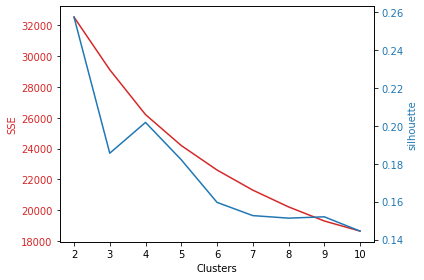

In [ ]:
# Showing distortions and silhouettes for each cluster
x = [i for i in range(2,11)]
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Clusters')
ax1.set_ylabel('SSE', color=color)
ax1.plot(x, distortions, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('silhouette', color=color) 
ax2.plot(x, silhouettes, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

Cluster chosen: k=4 because it has the higher Silouehette with the lower Distortion, so we compute the K-means algorithm with 4 clusters.

In [ ]:
k = 4
km = KMeans(k, init, n_init = iterations ,
            max_iter= max_iter, tol = tol, random_state = random_state)

y_km = km.fit_predict(X_pca)

In [ ]:
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_pca, y_km))
      
print('Distortion: %.2f' % km.inertia_)

Silhouette Coefficient: 0.202
Distortion: 26203.56


In [ ]:
fig = px.scatter(x=X_pca[:,0], y= X_pca[:,1], color = km.labels_)
fig.show()

Again, we can not properly see the clusters as it is shown in 2D, but we can know that its okay as we can see 4 different clusters.

## 7. Analysis/Interpretation of the Results

First, we will introduce each data into its cluster. And then, we show the most important information about each cluster from 0 to 3 (AKA, 4 clusters).

In [ ]:
df_white['kmeans_group'] = km.labels_
cluster_0 = df_white[df_white['kmeans_group'] == 0]
cluster_0.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kmeans_group
count,1720.000000,1720.000000,1720.000000,1720.000000,1720.000000,1720.000000,1720.000000,1720.000000,1720.000000,1720.000000,1720.000000,1720.000000,1720.0
mean,6.990640,0.279587,0.358390,11.419767,0.049102,46.318314,172.945349,0.997141,3.158500,0.497070,9.496802,5.617442,0.0
std,0.703723,0.092521,0.130668,4.293929,0.010766,17.023595,35.454145,0.002032,0.132845,0.099254,0.621929,0.758231,0.0
min,4.200000,0.105000,0.040000,0.900000,0.019000,6.000000,88.000000,0.991840,2.720000,0.290000,8.000000,3.000000,0.0
25%,6.500000,0.220000,0.270000,8.200000,0.043000,35.000000,149.000000,0.995770,3.070000,0.430000,9.000000,5.000000,0.0
50%,6.900000,0.260000,0.330000,11.600000,0.048000,46.000000,172.000000,0.997100,3.150000,0.490000,9.400000,6.000000,0.0
75%,7.400000,0.320000,0.420000,14.300000,0.054000,55.000000,196.000000,0.998300,3.230000,0.540000,9.800000,6.000000,0.0
max,10.700000,0.965000,1.000000,65.800000,0.120000,289.000000,440.000000,1.038980,3.660000,0.880000,12.800000,8.000000,0.0


In [ ]:
cluster_1 = df_white[df_white['kmeans_group'] == 1]
cluster_1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kmeans_group
count,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.0
mean,6.231215,0.275276,0.285786,3.378585,0.040299,31.881340,123.827489,0.992176,3.308810,0.522705,11.076149,6.134001,1.0
std,0.607164,0.108429,0.096037,2.635412,0.010681,13.912708,32.491128,0.001828,0.130201,0.126843,1.130912,0.896010,0.0
min,3.800000,0.080000,0.000000,0.700000,0.009000,3.000000,9.000000,0.987130,2.970000,0.260000,8.000000,3.000000,1.0
25%,5.800000,0.200000,0.240000,1.400000,0.033000,22.000000,101.000000,0.990800,3.220000,0.430000,10.200000,6.000000,1.0
50%,6.200000,0.260000,0.290000,2.200000,0.039000,31.000000,122.000000,0.992150,3.300000,0.500000,11.000000,6.000000,1.0
75%,6.600000,0.320000,0.330000,4.900000,0.046000,40.000000,144.000000,0.993520,3.380000,0.590000,12.000000,7.000000,1.0
max,8.100000,1.100000,0.740000,15.500000,0.115000,97.000000,249.500000,0.997000,3.820000,1.080000,14.050000,9.000000,1.0


In [ ]:
cluster_2 = df_white[df_white['kmeans_group'] == 2]
cluster_2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kmeans_group
count,1477.000000,1477.000000,1477.000000,1477.000000,1477.00000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.0
mean,7.382261,0.276926,0.350542,3.937068,0.03951,25.873731,113.392011,0.992380,3.099154,0.447732,11.162945,5.932295,2.0
std,0.803345,0.099957,0.108064,3.141315,0.01121,11.982773,31.928231,0.001809,0.104256,0.103760,1.060588,0.928774,0.0
min,5.600000,0.090000,0.060000,0.600000,0.01400,2.000000,18.000000,0.987110,2.740000,0.220000,8.400000,3.000000,2.0
25%,6.800000,0.210000,0.280000,1.400000,0.03200,17.000000,93.000000,0.991040,3.030000,0.370000,10.400000,5.000000,2.0
50%,7.200000,0.260000,0.340000,2.500000,0.03800,25.000000,113.000000,0.992340,3.110000,0.440000,11.100000,6.000000,2.0
75%,7.800000,0.320000,0.400000,6.000000,0.04600,34.000000,132.000000,0.993700,3.170000,0.510000,12.000000,6.000000,2.0
max,14.200000,1.005000,1.660000,19.800000,0.10200,73.000000,294.000000,0.999700,3.500000,1.000000,14.200000,9.000000,2.0


In [ ]:
cluster_3 = df_white[df_white['kmeans_group'] == 3]
cluster_3.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kmeans_group
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.0
mean,6.692308,0.320192,0.445096,4.350962,0.163692,39.822115,144.153846,0.994357,3.095096,0.463942,9.500962,5.480769,3.0
std,0.526887,0.113302,0.196839,3.578855,0.044036,18.836666,41.244598,0.001896,0.091397,0.086747,0.596673,0.737100,0.0
min,5.700000,0.130000,0.090000,0.800000,0.092000,5.000000,54.000000,0.988400,2.870000,0.300000,8.700000,3.000000,3.0
25%,6.400000,0.237500,0.300000,1.400000,0.131500,24.000000,109.750000,0.993115,3.040000,0.390000,9.200000,5.000000,3.0
50%,6.600000,0.300000,0.400000,3.100000,0.157000,37.000000,148.500000,0.994080,3.100000,0.450000,9.400000,5.000000,3.0
75%,7.000000,0.380000,0.562500,6.525000,0.181000,53.250000,175.000000,0.995220,3.170000,0.512500,9.500000,6.000000,3.0
max,8.000000,0.670000,1.000000,14.150000,0.346000,79.000000,240.000000,0.999300,3.290000,0.740000,13.400000,8.000000,3.0


In [ ]:
df_white.groupby(('kmeans_group')).describe()

fixed acidity                           ... quality               
                     count      mean       std  min  ...     25%  50%  75%  max
kmeans_group                                         ...                       
0                   1720.0  6.990640  0.703723  4.2  ...     5.0  6.0  6.0  8.0
1                   1597.0  6.231215  0.607164  3.8  ...     6.0  6.0  7.0  9.0
2                   1477.0  7.382261  0.803345  5.6  ...     5.0  6.0  6.0  9.0
3                    104.0  6.692308  0.526887  5.7  ...     5.0  5.0  6.0  8.0

[4 rows x 96 columns]

In [ ]:
df_white.groupby(('kmeans_group')).mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
kmeans_group,,,,,,,,,,,,
0,6.990640,0.279587,0.358390,11.419767,0.049102,46.318314,172.945349,0.997141,3.158500,0.497070,9.496802,5.617442
1,6.231215,0.275276,0.285786,3.378585,0.040299,31.881340,123.827489,0.992176,3.308810,0.522705,11.076149,6.134001
2,7.382261,0.276926,0.350542,3.937068,0.039510,25.873731,113.392011,0.992380,3.099154,0.447732,11.162945,5.932295
3,6.692308,0.320192,0.445096,4.350962,0.163692,39.822115,144.153846,0.994357,3.095096,0.463942,9.500962,5.480769


**Cluster 0:** it has the highest *sulfur dioxide* and the highest *residual sugar*. We suppose that the *residual sugar* is the decisive factor for the creation of the cluster.

**Cluster 1:** it is similar to the second cluster, both have the same amount of *alcohol* and *residual sugar*. It is the cluster with the less *citric acid*.

**Cluster 2:** it has the highest *fixed acidity*, the lower *chlorides* and *free sulfur dioxide*. Those features may make the difference with the other clusters. As we can see this cluster has the maximum value of citric acid, but this not affect the mean and the quality of it.

**Cluster 3:** it has the lowest number of components but it is remarcable the high mean value of *citric acid* compared to its *quality*.

**Deductions:**

*   The more *volatile or citric acid* the worse *quality* mean, as we can see the best cluster with respect to the quality is the number 1, with the lowest value of citric acid, and the worst one is the number 3 with the highest number of citric acid.
*   We suppose *pH* and *density* have nothing in relation with the clustering algorithm.
*   As wee can see the cluster number 2 has a high max value of citric acid, this is due to the element 745 which is an outlier, so we can assure the outliers doesn't affect the global computation.





### Visualization of the interpretation




Here we show some figures based on the mean of each feature by cluster.



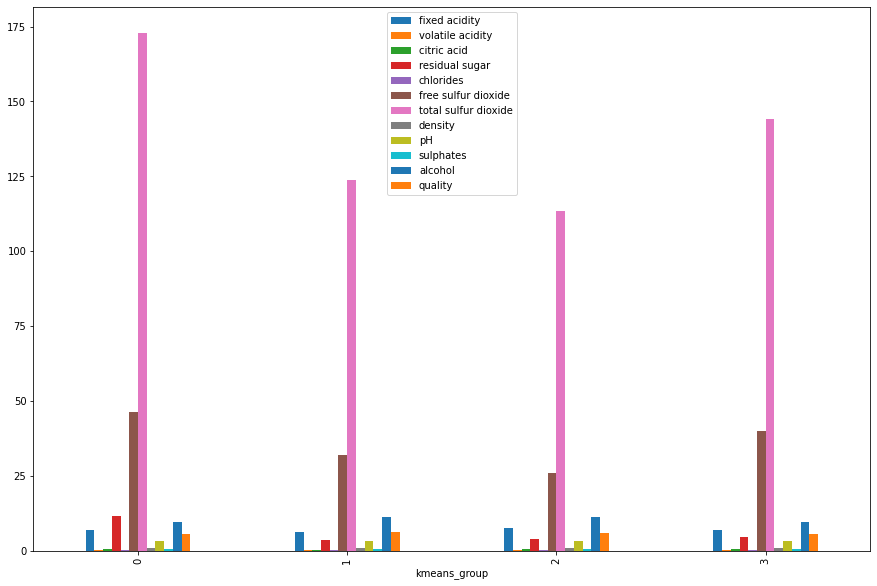

In [ ]:
figur = df_white.groupby(('kmeans_group')).mean()
figur.plot(kind='bar', legend=True, figsize=(15,10))

Total sulfur dioxide makes the data not show up very well, so we have removed this value for the display of the rest of the data

In [ ]:
df_without_sulfur = df_white.loc[:, df_white.columns.difference(["total sulfur dioxide"])]

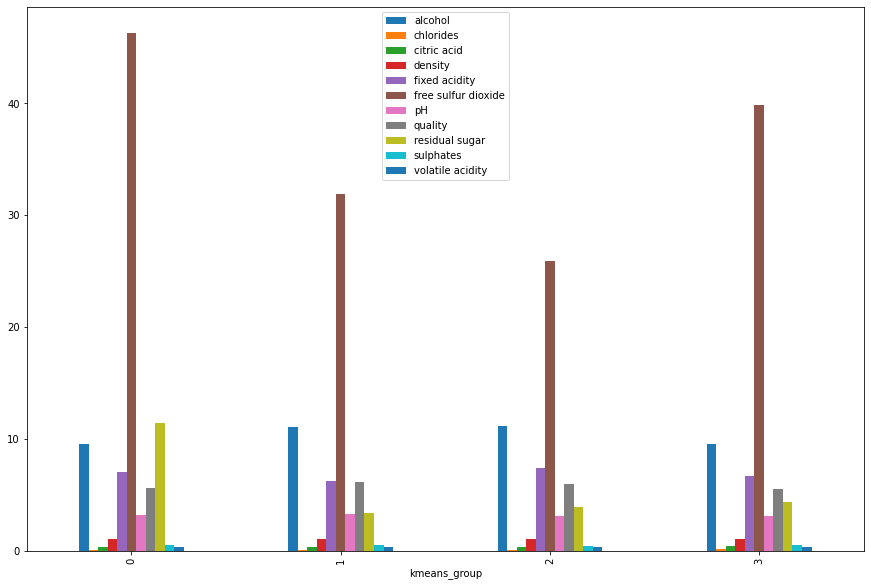

In [ ]:
res = df_without_sulfur.groupby(('kmeans_group')).mean()
res.plot(kind='bar', legend=True, figsize=(15,10))